In [29]:
%matplotlib inline
import os
import numpy as np
import torch
import torch.nn as nn
import torch.utils.data as td
import torch.nn.functional as F
import torchvision as tv
from PIL import Image
import nntools as nt
import matplotlib.pyplot as plt
from dataloader import VOCDataset, myimshow
import model
import glob
# from scipy.misc import imresize
from matplotlib.pyplot import imread
# im = imread(image.png)
import cv2

class statsmanager(nt.StatsManager):
    def __init__self():
        super(statsmanager,self).__init__()

    def init(self):
        super(statsmanager,self).init()
        self.m_ap=0

    def accumulate(self,loss,x,y,d):
        #Do m_ap calculations
        super(statsmanager,self).accumulate(loss,x,y,d)
    

    def summarize(self):
        loss=super(statsmanager,self).summarize()
        return {'loss':loss}

def plot(self,fig,ax1, ax2 ,im):
    ax1.set_title('Image')
    x,y=train_set[0]
    myimshow(x,ax=ax1)
    ax2.set_title('Yolo Net')
    ax2.plot([exp1.history[k][0]['loss']for k in range(exp1.epoch)],label='Training Loss')
    ax2.set_xlabel('Epochs')
    ax2.set_ylabel('Loss')
    ax2.legend(loc='best')
    plt.tight_layout()
    fig.canvas.draw()


In [2]:
lr=1e-3
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(device)
vgg = model.Yolo(64)
vgg.to(device)         
adam=torch.optim.Adam(vgg.parameters(),lr=lr)
stats_manager=statsmanager()
train_set=VOCDataset('/datasets/ee285f-public/PascalVOC2012/')
valid_set=VOCDataset('/datasets/ee285f-public/PascalVOC2012/', mode="val")
x,y=train_set[0]

# exp1=nt.Experiment(vgg,train_set,valid_set,adam,stats_manager,batch_size=64,output_dir="run2",perform_validation_during_training=True)
# fig, (ax1, ax2) = plt.subplots(ncols=2, nrows=1)
# exp1.load()
# exp1.run(num_epochs=150,plot=lambda exp:plot(exp,fig=fig,ax1=ax1, ax2=ax2 ,im=x))



cuda


In [40]:
print(x.shape)
print(y.shape)

torch.Size([3, 224, 224])
torch.Size([7, 7, 30])
tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        ...,

        [[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 

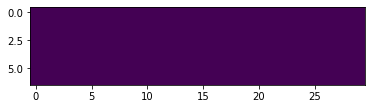

In [45]:
plt.imshow(y[0])

In [43]:

def plot(self,fig,ax1, ax2 ,im):
    ax1.set_title('Image')
    x,y=train_set[0]
    myimshow(x,ax=ax1)
    ax2.set_title('Yolo Net')
    ax2.plot([exp1.history[k]['loss']for k in range(exp1.epoch)],label='Training Loss')
    ax2.set_xlabel('Epochs')
    ax2.set_ylabel('Loss')
    ax2.legend(loc='best')
    plt.tight_layout()
    fig.canvas.draw()
    

TypeError: super(type, obj): obj must be an instance or subtype of type

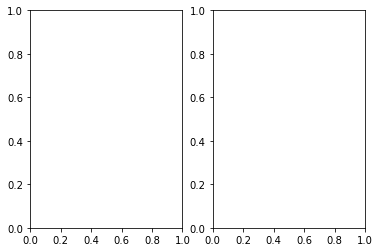

In [44]:
plt.close()
exp1=nt.Experiment(vgg,train_set,valid_set,adam,stats_manager,batch_size=64,output_dir="newloss",perform_validation_during_training=False)
fig, (ax1, ax2) = plt.subplots(ncols=2, nrows=1)
exp1.load()
exp1.run(num_epochs=150,plot=lambda exp:plot(exp,fig=fig,ax1=ax1, ax2=ax2 ,im=x))

In [5]:
def decoder(pred):

    
    contain1 = pred[:,:,4].unsqueeze(2)
    contain2 = pred[:,:,9].unsqueeze(2)
    contain = torch.cat((contain1,contain2),2)
    mask1 = contain > 0.1 
    mask2 = (contain==contain.max())
    mask = (mask1+mask2).gt(0)
    boxes=[]
    cls_indexs=[]
    probs=[]
    for i in range(7):
        for j in range(7):
            for b in range(2):
              
                xc=pred[i,j,b*5]
                    
                w=pred[i,j,b*5+2]
                yc=pred[i,j,b*5+1]
                h=pred[i,j,b*5+3]
                xy = torch.FloatTensor([j,i])*(1./7)
                x1=(xc-(w/2))
                x2=(xc+(w/2))
                y1=(yc-(h/2))
                y2=(yc+(h/2))
                box = pred[i,j,b*5:b*5+4]
                bbox=torch.FloatTensor(box.size())
                bbox[0]=x1
                bbox[1]=y1
                bbox[2]=x2
                bbox[3]=y2
                contain_prob=torch.FloatTensor([pred[i,j,b*5+4]])
                max_prob,cls_index = torch.max(pred[i,j,10:],0)
                if float((contain_prob*max_prob)[0]) > 0.1:
                    boxes.append(bbox.view(1,4))
                    cls_indexs.append(cls_index)
                    probs.append(contain_prob*max_prob)
    print(cls_indexs)
    if len(boxes)==0 or len(cls_indexs)==0:
        boxes = torch.zeros((1,4))
        probs = torch.zeros(1)
        cls_indexs = torch.zeros(1)
    else:
        boxes = torch.cat(boxes,0) #(n,4)
        probs = torch.cat(probs,0) #(n,)
        cls_indexs = torch.stack(cls_indexs,0) #(n,)
    return boxes,probs,cls_indexs

In [6]:
def nms(bboxes,scores,threshold=0.5):
    '''
    bboxes(tensor) [N,4]
    scores(tensor) [N,]
    '''
    x1 = bboxes[:,0]
    y1 = bboxes[:,1]
    x2 = bboxes[:,2]
    y2 = bboxes[:,3]
    areas = (x2-x1) * (y2-y1)
    _,order = scores.sort(0,descending=True)
    keep = []
    order1=order.numpy()
    while order1.size > 0:

        if order1.size == 1:
            i = order1
            keep.append(i)
            break
        i = order1[0]
        keep.append(i)
        xx1 = x1[order[1:]].clamp(min=x1[i].item())
        yy1 = y1[order[1:]].clamp(min=y1[i].item())
        xx2 = x2[order[1:]].clamp(max=x2[i].item())
        yy2 = y2[order[1:]].clamp(max=y2[i].item())

        w = (xx2-xx1).clamp(min=0)
        h = (yy2-yy1).clamp(min=0)
        inter = w*h

        ovr = inter / (areas[i] + areas[order[1:]] - inter)
        ids = (ovr<=threshold).nonzero().squeeze()
        if ids.numel() == 0:
            break
        order = order[ids+1]
        order1=order.numpy()
    return torch.LongTensor(keep)

In [7]:
def gt(img_path,lbl_path):
    image_names=os.listdir(img_path)
    image_names=[image.rstrip('.jpg') for image in image_names]
    
    
    lbl_tree = ET.parse(lbl_path)
    objs = []
    bbox=[]
    bboxes=[] 
    label=[]
    labels=[]
    
    voc_dict = {
                        'person':1, 'bird':2, 'cat':3, 'cow':4, 'dog':5, 
                        'horse':6, 'sheep':7, 'aeroplane':8, 'bicycle':9,
                        'boat':10, 'bus':11, 'car':12, 'motorbike':13, 'train':14, 
                        'bottle':15, 'chair':16, 'diningtable':17, 
                        'pottedplant':18, 'sofa':19, 'tvmonitor':20
                        }
    
    img = imread(img_path)
    h,w,_=img.shape
    for obj in lbl_tree.iter(tag='object'):
        name = obj.find('name').text
        for box in obj.iter(tag='bndbox'):
            if name=='person':
                xmax = box.find('xmax').text
                xmin = box.find('xmin').text
                ymax = box.find('ymax').text
                ymin = box.find('ymin').text
                break
            xmax = box.find('xmax').text
            xmin = box.find('xmin').text
            ymax = box.find('ymax').text
            ymin = box.find('ymin').text
        attr = (voc_dict[name], float((float(xmin)+float(xmax))/2),float((float(ymin)+float(ymax))/2), float(float(xmax)-float(xmin)), float(float(ymax)-float(ymin)), 1)
        attr1=float(xmin)/w,float(ymin)/h,float(xmax)/w,float(ymax)/h
        objs.append(attr)
        bbox.append(attr1)
    box1=torch.Tensor(len(bbox),4)
    for i in range(len(bbox)):
        box1[i][0]=bbox[i][0]
        box1[i][1]=bbox[i][1]
        box1[i][2]=bbox[i][2]
        box1[i][3]=bbox[i][3]
    #bbox=torch.Tensor(bbox)
    return box1